In [477]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Plot Anatomy

<img src="https://miro.medium.com/max/419/0*4YHR28Wt4LWg77e3.png" />


## Plotting Tools

<img src="https://dw1.s81c.com/IMWUC/MessageImages/2cfefa40ad224bd7b4e9b6c18885f983.png" />

In [478]:
# dataset
df = pd.read_csv('~/ecommerce-order.csv')
df.order_date = pd.to_datetime(df.order_date)
display(df.head())
df.info()

,order_id,product_name,quantity,unit_price,total_price,customer_name,customer_email,shipping_address,order_date,payment_method
0,1,Thai Green Curry Paste,61,263.81,16092.41,Cathrine Lyall,clyall0@chicagotribune.com,2 Meadow Ridge Point,2022-09-14,Credit Card
1,2,Pistachio Ice Cream,56,966.38,54117.28,Raddy Hadcock,rhadcock1@cocolog-nifty.com,5 Debs Crossing,2022-06-17,Cash on Delivery
2,3,Cinnamon Sugar Tortilla Chips,7,925.76,6480.32,Siouxie Gregoletti,sgregoletti2@wunderground.com,6 Graceland Alley,2022-05-29,Cash on Delivery
3,4,Herbed Goat Cheese,65,605.00,39325.00,Dyanne Ruddlesden,druddlesden3@nifty.com,50 Ronald Regan Lane,2022-04-14,Cash on Delivery
4,5,Crispy Kale Chips,40,939.43,37577.20,Dulci Greenlees,dgreenlees4@google.com.br,9777 Hayes Circle,2022-05-25,PayPal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1000 non-null   int64         
 1   product_name      1000 non-null   object        
 2   quantity          1000 non-null   int64         
 3   unit_price        1000 non-null   float64       
 4   total_price       1000 non-null   float64       
 5   customer_name     1000 non-null   object        
 6   customer_email    1000 non-null   object        
 7   shipping_address  1000 non-null   object        
 8   order_date        1000 non-null   datetime64[ns]
 9   payment_method    1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 78.3+ KB


## Bar Chart


In [479]:
# show top 5 customer spending
result = df.groupby(by=['customer_name'], as_index=False).\
    agg({"total_price": "sum"}).\
    sort_values(by=['total_price'], ascending=False).\
    head(5)

print("dataframe result")
result

dataframe result


,customer_name,total_price
231,Corena Ownsworth,91947.04
815,Rolfe Klainman,91856.38
836,Ruggiero Lanahan,90824.24
961,Vern Harsnep,90821.86
195,Chip Diggles,88553.00


### Matplotlib and Seaborn

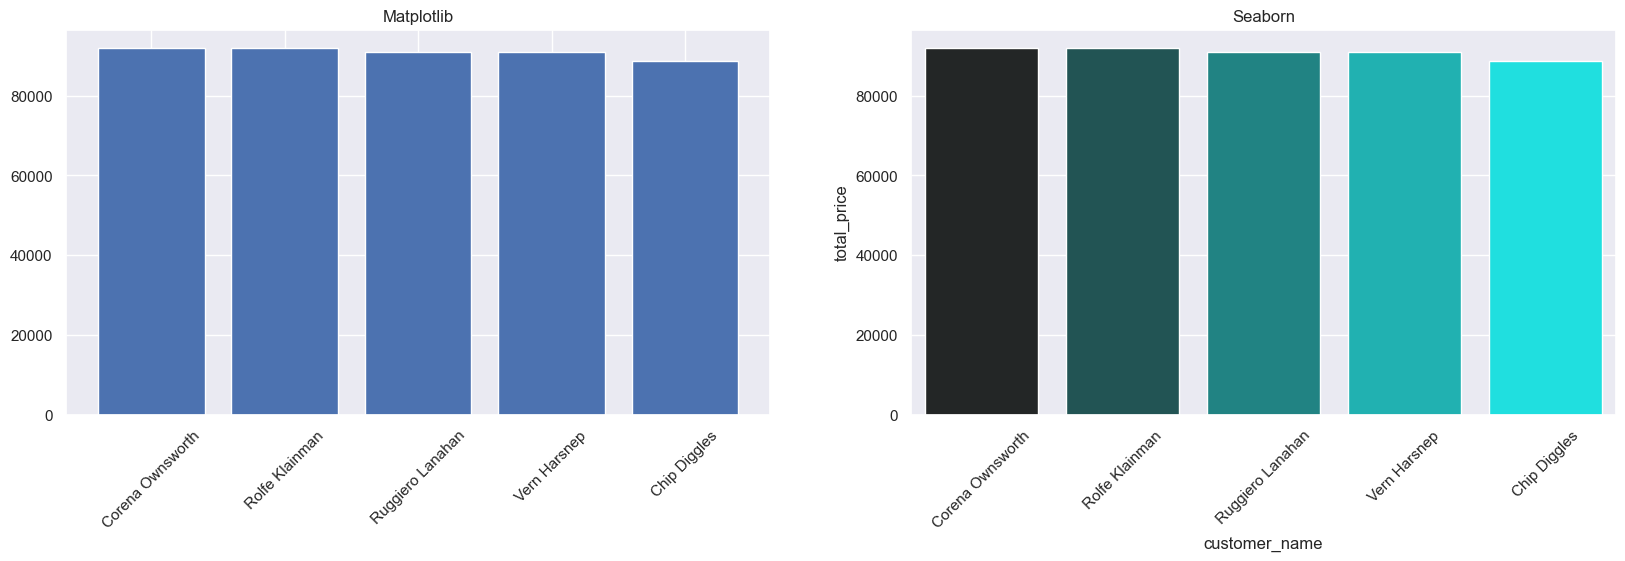

In [480]:
# matplotlib
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].set_title("Matplotlib")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].bar(x=result.customer_name, height=result.total_price)

# seaborn
ax[1].set_title("Seaborn")
ax[1].tick_params(axis='x', labelrotation=45)
sns.barplot(
    data=result,
    x=result.customer_name,
    y=result.total_price,
    ax=ax[1],
    color='cyan',
    hue=result.customer_name,
    palette='dark:cyan'
)

plt.show()

<Axes: xlabel='customer_name'>

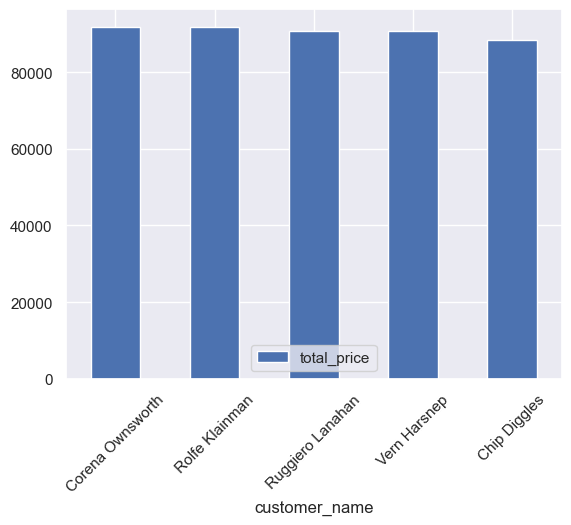

In [481]:
# generate from pandas
result.set_index('customer_name').plot.bar(rot=45)

### Plotly

In [482]:
# plotly
px.bar(data_frame=result, x=result.customer_name, y=result.total_price)

In [483]:
# as pandas backend
result.plot(x=result.customer_name, y=result.total_price, backend='plotly', kind='bar')

## Line Chart

In [484]:
# show order sold per month
lineDf = df.copy()
lineDf['order_month_num'] = df.order_date.dt.month
lineDf['order_month'] = df.order_date.dt.month_name()

result = lineDf.groupby(by=['order_month', 'order_month_num'], as_index=False).agg({"quantity": 'sum'}).\
    sort_values(by=['order_month_num'])
display(result.head())

,order_month,order_month_num,quantity
4,January,1,4189
3,February,2,4555
7,March,3,3789
0,April,4,4166
8,May,5,3705


### Matplotlib and Seaborn

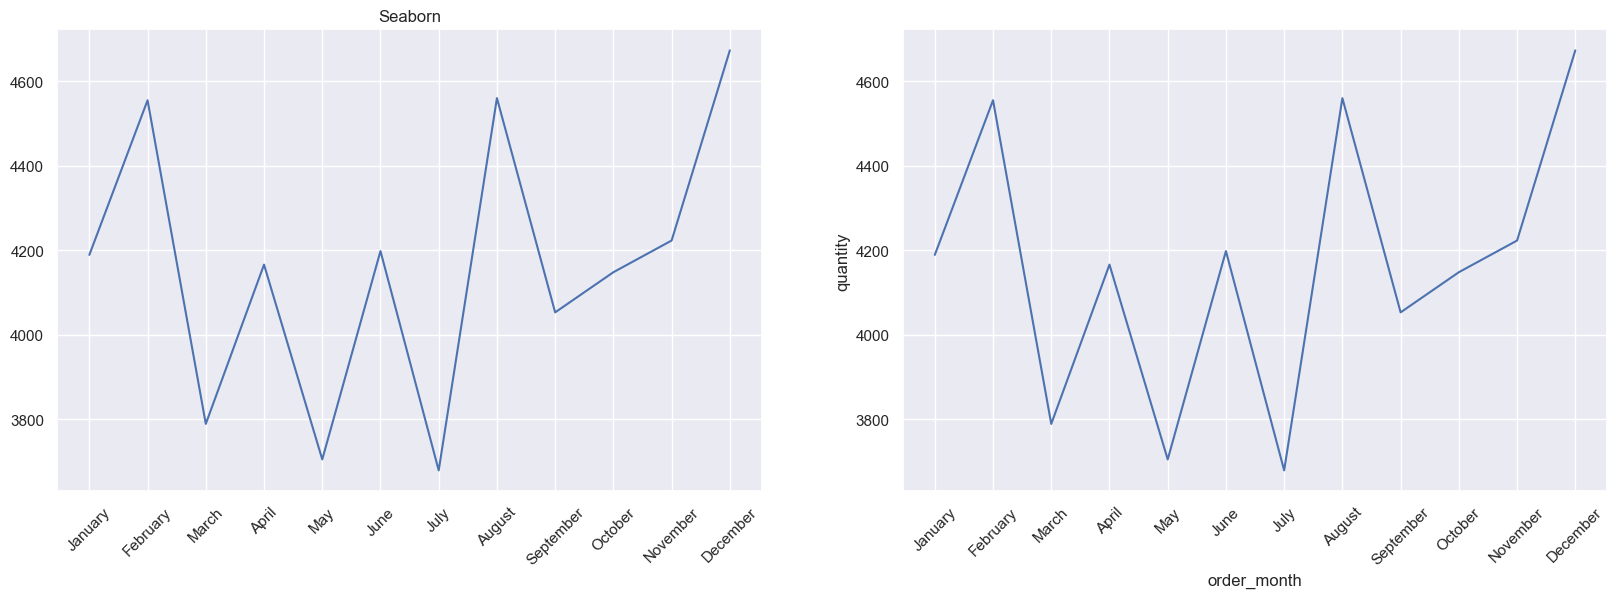

In [485]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax[0].set_title("Matplotlib")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].plot(result.order_month, result.quantity)

ax[0].set_title("Seaborn")
ax[1].tick_params(axis='x', labelrotation=45)
sns.lineplot(
    data=result,
    x=result.order_month,
    y=result.quantity,
    ax=ax[1],
)

plt.show()

### Plotly

In [486]:
px.line(result, x="order_month", y="quantity")

## Pie Chart

In [487]:
# show payment method preferences
counts = df.groupby(by=['payment_method']).payment_method.count().to_list()
payment_methods = df.payment_method.unique()

### Matplotlib

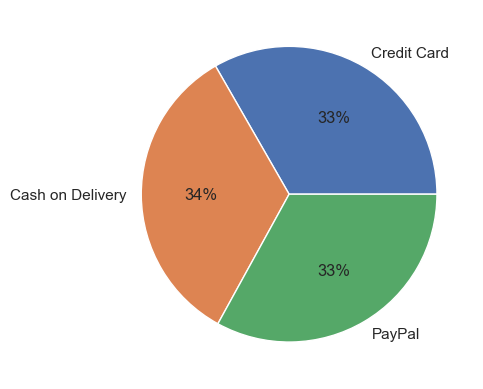

In [488]:
plt.pie(x=counts, labels=payment_methods, autopct='%.0f%%')
plt.show()

### Plotly

In [489]:
px.pie(data_frame=df, values=counts, names=payment_methods)

## Scatter Plot

### Matplotlib

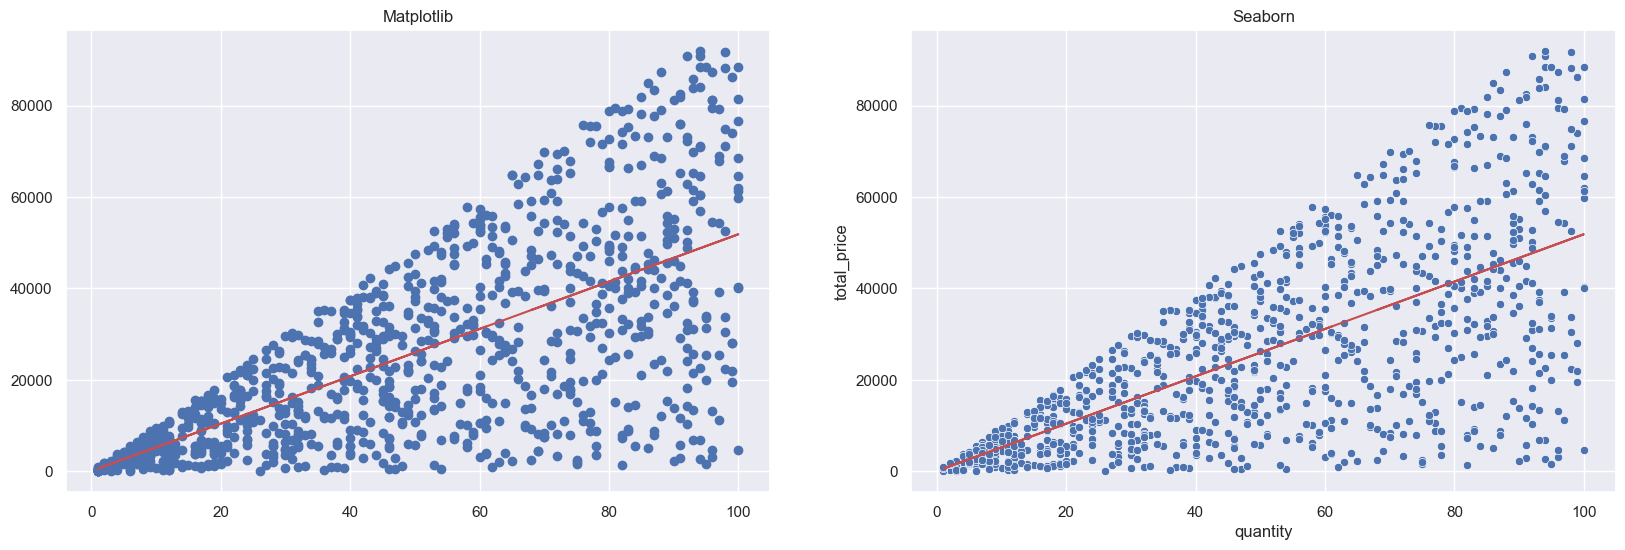

In [490]:
import numpy as np

fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax[0].set_title("Matplotlib")
ax[0].scatter(df.quantity, df.total_price)

ax[1].set_title("Seaborn")
sns.scatterplot(
    data=df,
    x=df.quantity,
    y=df.total_price,
    ax=ax[1],
)

# add linear trendline
z = np.polyfit(df.quantity, df.total_price, 1)
p = np.poly1d(z)
ax[0].plot(df.quantity,p(df.quantity),"r-")
ax[1].plot(df.quantity,p(df.quantity),"r-")

plt.show()

### Plotly

In [491]:
px.scatter(df, x=df.quantity, y=df.total_price, trendline='ols', trendline_color_override='red')

## Histogram

In [492]:
df[df.total_price < 20000]

,order_id,product_name,quantity,unit_price,total_price,customer_name,customer_email,shipping_address,order_date,payment_method
0,1,Thai Green Curry Paste,61,263.81,16092.41,Cathrine Lyall,clyall0@chicagotribune.com,2 Meadow Ridge Point,2022-09-14,Credit Card
2,3,Cinnamon Sugar Tortilla Chips,7,925.76,6480.32,Siouxie Gregoletti,sgregoletti2@wunderground.com,6 Graceland Alley,2022-05-29,Cash on Delivery
6,7,Carrot Sticks,46,118.69,5459.74,Persis Leaman,pleaman6@shop-pro.jp,887 Walton Crossing,2022-06-02,Cash on Delivery
11,12,Basil Tomato Soup,58,107.17,6215.86,Hayward Berfoot,hberfootb@reuters.com,6 Vidon Parkway,2022-12-18,Cash on Delivery
12,13,Cereal Dispenser with Portion Control,31,523.62,16232.22,Gearalt Haughey,ghaugheyc@smh.com.au,2 Badeau Drive,2022-05-15,PayPal
...,...,...,...,...,...,...,...,...,...,...
989,990,Baked Potato Chips,1,955.64,955.64,Eugenie Urwen,eurwenrh@aboutads.info,32 Loftsgordon Parkway,2022-03-31,PayPal
992,993,Colorful Post-It Notes Set,87,90.05,7834.35,Sonny Yegorkov,syegorkovrk@bizjournals.com,75 Northport Park,2022-06-18,PayPal
993,994,Folding Exercise Bike,86,60.19,5176.34,Doug Cringle,dcringlerl@typepad.com,22 Melvin Trail,2022-05-21,Cash on Delivery
996,997,Salsa Verde,4,58.99,235.96,Addia Cricket,acricketro@myspace.com,9344 Dahle Plaza,2022-01-27,Cash on Delivery


### Matplotlib and Seaborn

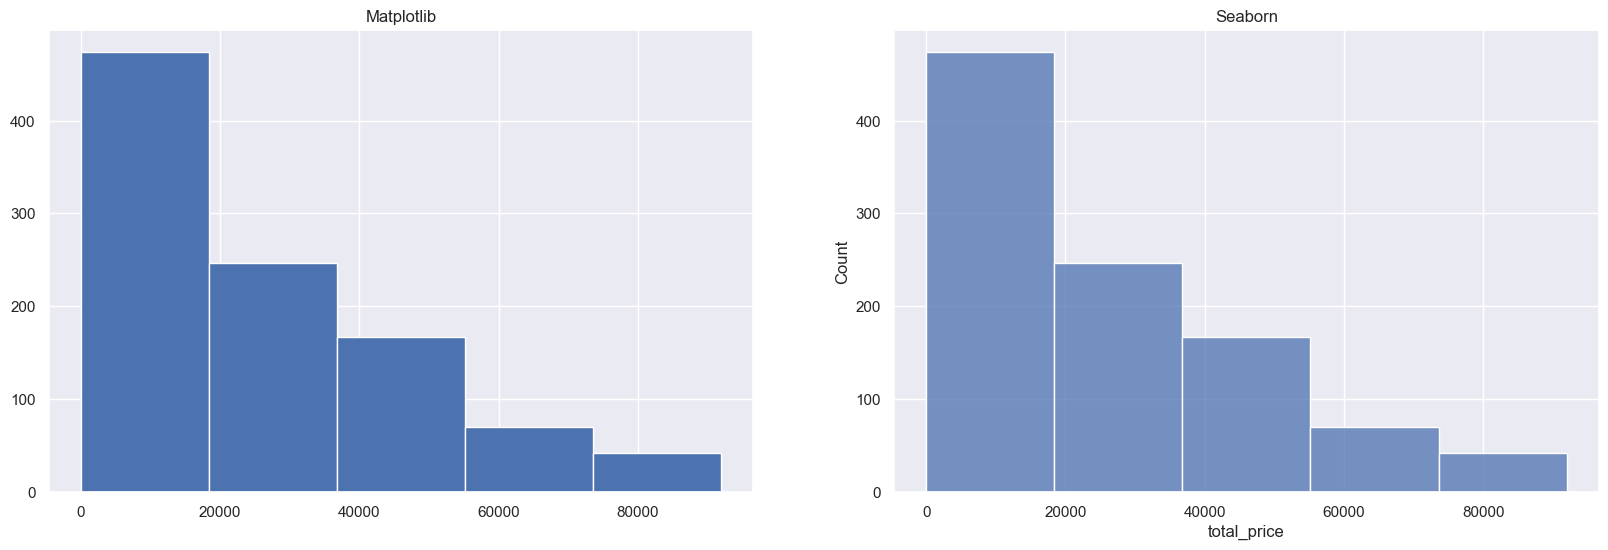

In [493]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
ax[0].set_title("Matplotlib")
ax[0].hist(x=df.total_price, bins=5)

ax[1].set_title("Seaborn")
sns.histplot(
    data=df,
    x=df.total_price,
    ax=ax[1],
    bins=5
)

plt.show()

### Plotly

In [494]:
px.histogram(df, x="total_price", nbins=5)